In [2]:
squad_ids = {
    "8634":{ # Barca
        "low":"#0B218F",
        "high":"#fdc526"
    },
    "8633":{ # Real Madrid
        "low":"#7752FF",
        "high":"#FFFFFF"
    },
    "9906":{ # Atletico
        "low":"#0B218F",
        "high":"#EB4747"
    },
    "8560":{ # Real Sociedad
        "low":"#FFFFFF",
        "high":"#3A96FF"
    },
    "8315":{ # Bilbao
        "low":"#FFFFFF",
        "high":"#FA3315"
    },
    "8603":{ # Betis
        "low":"#254441",
        "high":"#43AA8B"
    },
    "10205":{ # Villarreal
        "low":"#43AA8B",
        "high":"#E2BB0B"
    },
    "8370":{ # Rayo
        "low":"#EBD546",
        "high":"#EB4747"
    },
    "8371":{ # Osasuna
        "low":"#46C7EB",
        "high":"#EB4747"
    },
    "8661":{ # Mallorca
        "low":"#EBD546",
        "high":"#EF3054"
    },
    "10267":{ # Valencia
        "low":"#46C7EB",
        "high":"#FF6F59"
    },
    "7732":{ # Girona
        "low":"#FFFFFF",
        "high":"#FA3315"
    },
    "8305":{ # Getafe
        "low":"#43AA8B",
        "high":"#46C7EB"
    },
    "9865":{ # Almeria
        "low":"#FFFFFF",
        "high":"#46C7EB"
    },
    "10281":{ # real valladrid
        "low":"#43AA8B",
        "high":"#7752FF"
    },
    "9910":{ # Celta
        "low":"#FA3315",
        "high":"#46C7EB"
    },
    "8302":{ # Sevilla
        "low":"#FFFFFF",
        "high":"#EF3054"
    },
    "8385":{ # Espanyool
        "low":"#FFFFFF",
        "high":"#3A96FF"
    },
    "10268":{ # Elche
        "low":"#EBD546",
        "high":"#46C7EB"
    }
}

### plot table
https://github.com/znstrider/plottable

###  別参考サイト

https://matplotlib.org/matplotblog/posts/how-to-create-custom-tables/

In [37]:
import matplotlib as mpl
import matplotlib.patches as patches
from matplotlib import pyplot as plt

%load_ext autoreload
%autoreload 2

from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

from plottable import ColumnDefinition, Table
from plottable.cmap import normed_cmap
from plottable.formatters import decimal_to_percent
from plottable.plots import circled_image # image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
squad_name = [
    'Barcelona', 'Real Madrid', 'Atlético Madrid', 'Real Sociedad',
    'Athletic Club', 'Betis', 'Villarreal', 'Rayo Vallecano',
    'Osasuna', 'Mallorca', 'Valencia', 'Girona',
    'Getafe', 'Almería', 'Valladolid', 'Celta Vigo',
    'Sevilla', 'Cádiz', 'Espanyol', 'Elche'
]
squad_id = [
    '8634', '8633', '9906', '8560', '8315', '8603', '10205', '8370', 
    '8371', '8661', '10267', '7732', '8305', '9865', '10281', '9910', 
    '8302', '10268', '8385'
]

squad_name = [
    "Arsenal", "Manchester City", "Manchester Utd", "Crystal Palace",
    "West Ham", "Aston Villa", "Bournemouth","Leeds United",
    "Liverpool", "Brighton", "Tottenham", "Brentford",
    "Fulham", "Chelsea", "Newcastle Utd", "Wolves",
    "Southampton"
]
squad_id = [
    '9825', '8456', '10260', '9826',
    '8654', '10252', '8678', '8463', 
    '8650', "10204", "8586", "9937",
    "9879", "8455", "10261", "8602",
    "8466"
    #'8455', '8586', '8197', '10204'
]

squad_name = [
    'América (MG)', 'Fluminense', 'Avaí', 'Corinthians',
    'Goiás', 'São Paulo', 'Santos', 'Bragantino',
    'Flamengo', 'Palmeiras', 'Internacional',
    'Coritiba', 'Botafogo (RJ)','Atl Paranaense',
    'Atlético Mineiro', 'Cuiabá', "Vasco da Gama",
    'Juventude', 'Ceará', 
]
squad_id = [
    '1757', '9863', '104822', '9808',
    '9862', "10277", '8514', "109705", 
    '9770', "10283", "8702", 
    "9767", "8517", '10273', 
    "10272", "197815", "10276",
    "10274","172341",]

_squad = dict(zip(squad_name, squad_id))

In [96]:
df1 = pd.read_csv("/work/assets/fbref/leagueStats/brazil/2122/standard.csv")
df2 = pd.read_csv("/work/assets/fbref/leagueStats/brazil/2122/possession.csv")
df3 = pd.read_csv("/work/assets/fbref/leagueStats/brazil/2122/gca.csv")

def input_squad_id(df):
    for idx, row in df.iterrows():
        for key,val in _squad.items():
            if row["Squad"]== key:
                df.loc[idx,"Squad_id"] = int(val)   

input_squad_id(df1)

# df = pd([df1, df2], axis=1)
df = df1.merge(df2)
df = df.merge(df3)

df = df[df["Min_Playing Time"] > 0]
df = df[df["Age"] < 20]
# df = df[df["Att_Take-Ons"] > df["Att_Take-Ons"].mean()]
df["Att_Take-Ons per90"] = round(df["Att_Take-Ons"] / df['90s_Playing Time'],2)

df["Nation"] = [nation.split("  ")[1] for nation in df["Nation"]]
print(df["Nation"].unique())

df.columns

df.sort_values(by="Min_Playing Time", ascending=False).head(10)
# df[df["Player"]=="Pedro Neto"]
df.sort_values(by="Min_Playing Time", ascending=False).head(10)[["Squad","Squad_id"]] #["Squad"].unique()

['BRA' 'PAR' 'ECU' 'POR' 'BOL' 'CHI']


<bound method Index.unique of Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born',
       'MP_Playing Time', 'Starts_Playing Time', 'Min_Playing Time',
       '90s_Playing Time', 'Gls_Performance', 'Ast_Performance',
       'G+A_Performance', 'G-PK_Performance', 'PK_Performance',
       'PKatt_Performance', 'CrdY_Performance', 'CrdR_Performance',
       'xG_Expected', 'npxG_Expected', 'xAG_Expected', 'npxG+xAG_Expected',
       'PrgC_Progression', 'PrgP_Progression', 'PrgR_Progression',
       'Gls_Per 90 Minutes', 'Ast_Per 90 Minutes', 'G+A_Per 90 Minutes',
       'G-PK_Per 90 Minutes', 'G+A-PK_Per 90 Minutes', 'xG_Per 90 Minutes',
       'xAG_Per 90 Minutes', 'xG+xAG_Per 90 Minutes', 'npxG_Per 90 Minutes',
       'npxG+xAG_Per 90 Minutes', 'Squad_id', '90s', 'Touches_Touches',
       'Def Pen_Touches', 'Def 3rd_Touches', 'Mid 3rd_Touches',
       'Att 3rd_Touches', 'Att Pen_Touches', 'Live_Touches', 'Att_Take-Ons',
       'Succ_Take-Ons', 'Succ%_Take-Ons', 'Tkld_Ta

In [97]:
flag_paths = list(Path("/work/assets/country_flags").glob("*.png"))
country_to_flagpath = {p.stem: p for p in flag_paths}

df.insert(0, "Flag", df["Nation"].apply(lambda x: country_to_flagpath.get(x)))

target_cols = ["Player", "Flag", "Min_Playing Time", 'Age', "Gls_Per 90 Minutes", "Ast_Per 90 Minutes",
               "npxG+xAG_Per 90 Minutes", "Att_Take-Ons per90", "Succ%_Take-Ons", 'GCA90_GCA', 'SCA90_SCA', "Squad_id"]
rename_cols = ["Player", "Flag", "Play Time", 'Age', "Goals", "Assists",
               "npxG+xA", "Attempt Dribbles", "Succ Dribbles%", 'G-Create', 'S-Create', "Squad_id"]

rename_dict = dict(zip(target_cols, rename_cols))
df.rename(columns=rename_dict, inplace=True)

df = df[rename_cols]

In [98]:
cmap = LinearSegmentedColormap.from_list(
    name="bugw", colors=["#ffffff", "#f2fbd2", "#c9ecb4", "#93d3ab", "#35b0ab"], N=256
)

In [111]:
from matplotlib.font_manager import FontProperties
font_prop = FontProperties(fname="/usr/share/fonts/Nippo-Regular.ttf")
matplotlib.rcParams['font.family'] = font_prop.get_name()

col_defs = (
    [
        ColumnDefinition(
            name="Flag",
            title="Nation",
            textprops={"ha": "center"},
            width=0.5,
            plot_fn=circled_image,
        ),
        ColumnDefinition(
            name="Player",
            textprops={"ha": "left", "weight": "bold", "fontproperties": font_prop },
            width=1.2,
        ),
        ColumnDefinition(
            name="Age",
            textprops={"ha": "left", "weight": "bold", "fontproperties": font_prop, "fontsize": 18 },
            width=1.2,
        ),
        ColumnDefinition(
            name=rename_cols[3],
            textprops={"ha": "center"},
            width=0.6,
        ),
        ColumnDefinition(
            name=rename_cols[4],
            #textprops={"ha": "center"},
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            width=0.75,
            group="Actual Result",
            cmap=normed_cmap(df[rename_cols[4]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[5],
            width=0.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Actual Result",
            cmap=normed_cmap(df[rename_cols[5]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[6],
            width=.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Expected Result",
            cmap=normed_cmap(df[rename_cols[6]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[7],
            title="Attempt",
            width=.8,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Dribbles",
            cmap=normed_cmap(df[rename_cols[7]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[8],
            title="Success %",
            width=.8,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Dribbles",
            cmap=normed_cmap(df[rename_cols[8]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[9],
            width=.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Creativity",
            cmap=normed_cmap(df[rename_cols[9]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        ),
        ColumnDefinition(
            name=rename_cols[10],
            width=.75,
            textprops={
                "ha": "center",
                "bbox": {"boxstyle": "circle", "pad": 0.35},
            },
            group="Creativity",
            cmap=normed_cmap(df[rename_cols[10]], cmap=matplotlib.cm.coolwarm, num_stds=2.5),
        )
])

In [112]:
data = df[rename_cols].sort_values(by=rename_cols[2], ascending=False).head(10)  
data.index = np.arange(1, len(data)+1)

data

,Player,Flag,Play Time,Age,Goals,Assists,npxG+xA,Attempt Dribbles,Succ Dribbles%,G-Create,S-Create,Squad_id
1,Marcos Leonardo,/work/assets/country_flags/BRA.png,2882,18,0.41,0.09,0.47,1.41,46.7,0.22,1.94,8514.0
2,Matheus Martins,/work/assets/country_flags/BRA.png,1604,18,0.17,0.28,0.37,4.83,39.5,0.84,3.88,9863.0
3,Ângelo Borges,/work/assets/country_flags/BRA.png,1532,17,0.06,0.41,0.32,8.47,59.7,0.65,4.94,8514.0
4,Vitor Roque,/work/assets/country_flags/BRA.png,1315,16,0.34,0.14,0.47,3.22,31.9,0.62,2.67,10273.0
5,Victor Hugo,/work/assets/country_flags/BRA.png,1251,17,0.14,0.14,0.34,2.59,55.6,0.65,2.52,9770.0
6,Luizão,/work/assets/country_flags/BRA.png,991,19,0.09,0.00,0.08,0.27,33.3,0.09,0.64,10277.0
7,Robert Renan,/work/assets/country_flags/BRA.png,900,18,0.00,0.00,0.01,0.20,100.0,0.00,0.40,9808.0
8,Lázaro,/work/assets/country_flags/BRA.png,821,19,0.44,0.22,0.57,3.30,60.0,0.22,3.07,9770.0
9,Sandry,/work/assets/country_flags/BRA.png,692,19,0.00,0.13,0.20,0.78,50.0,0.39,4.14,8514.0
10,Matheus França,/work/assets/country_flags/BRA.png,672,17,0.54,0.00,0.53,3.73,57.1,0.13,2.54,9770.0


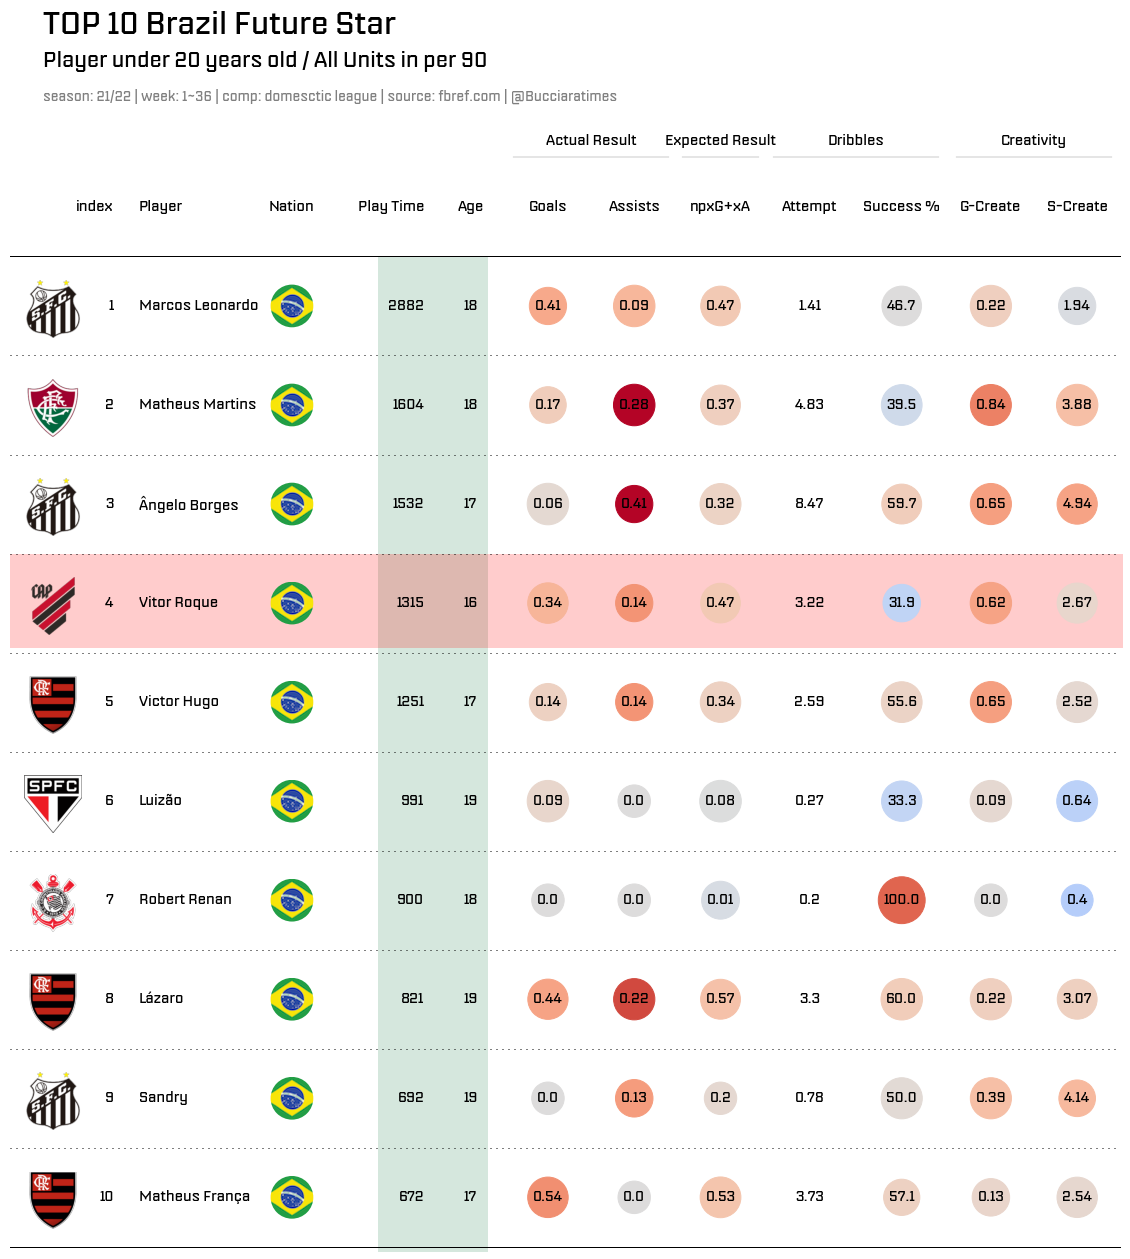

In [125]:
fig, ax = plt.subplots(figsize=(20, 22))

table = Table(
    data.iloc[:,:-1],
    column_definitions=col_defs,
    row_dividers=True,
    footer_divider=True,
    ax=ax,
    textprops={"fontsize": 15},
    row_divider_kw={"linewidth": 1, "linestyle": (0, (1, 5))},
    col_label_divider_kw={"linewidth": 1, "linestyle": "-"},
    column_border_kw={"linewidth": 1, "linestyle": "-"},
)#.autoset_fontcolors(colnames=[rename_cols[5], rename_cols[6]])

fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# Native data to normalized data coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
for y in range(10):
    x = 0
    team_id = data['Squad_id'].iloc[y]
    ax_coords = DC_to_NFC([x + .12, y + .85])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.04, 0.04], anchor = "W")
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{team_id:.0f}.png")) #.convert("LA")
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    
rect = patches.Rectangle(
	(3.2, 0),
    #(5.6, 0),  # bottom left starting position (x,y)
	.95,  # width
	100,  # height
	ec='none',
	fc='seagreen',
	alpha=.2,
# 	zorder=-1
)
rect2 = patches.Rectangle(
	(0, 3),
    #(5.6, 0),  # bottom left starting position (x,y)
	100,  # width
	.95,  # height
	ec='none',
	fc='red',
	alpha=.2,
# 	zorder=-1
)
ax.add_patch(rect)
ax.add_patch(rect2)


fig_text(
    x=0.15, y=.89, 
    s='TOP 10 Brazil Future Star',
    va='bottom', ha='left',
    fontsize=32, color='#000000', fontproperties=font_prop, fontweight='bold'
)
fig_text(
	x=0.15, y=.87, 
    s='Player under 20 years old / All Units in per 90',
	va='bottom', ha='left',
	fontsize=22, color='#010101', fontproperties=font_prop
)
fig_text(
	x=0.15, y=.85, 
    s='season: 21/22 | week: 1~36 | comp: domesctic league | source: fbref.com | @Bucciaratimes',
	va='bottom', ha='left',
	fontsize=14, color='gray', fontproperties=font_prop
)

fig.savefig("/work/output/table52.png", facecolor=ax.get_facecolor(), dpi=200)

(-0.15000000000000002, 3.15, -1.0, 3.0)

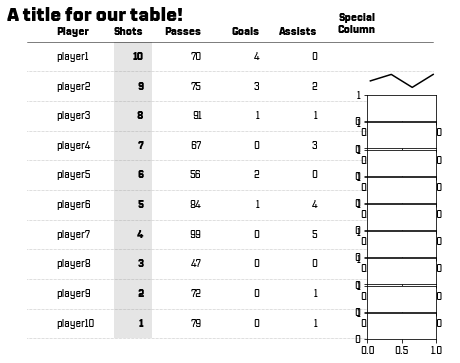

In [122]:
# first, we'll create a new figure and axis object

fig, ax = plt.subplots(figsize=(8,6))

# set the number of rowsM
rows = 10
cols = 6


data = [
        {'id': 'player10', 'shots': 1, 'passes': 79, 'goals': 0, 'assists': 1},
        {'id': 'player9', 'shots': 2, 'passes': 72, 'goals': 0, 'assists': 1},
        {'id': 'player8', 'shots': 3, 'passes': 47, 'goals': 0, 'assists': 0},
        {'id': 'player7', 'shots': 4, 'passes': 99, 'goals': 0, 'assists': 5},
        {'id': 'player6', 'shots': 5, 'passes': 84, 'goals': 1, 'assists': 4},
        {'id': 'player5', 'shots': 6, 'passes': 56, 'goals': 2, 'assists': 0},
        {'id': 'player4', 'shots': 7, 'passes': 67, 'goals': 0, 'assists': 3},
        {'id': 'player3', 'shots': 8, 'passes': 91, 'goals': 1, 'assists': 1},
        {'id': 'player2', 'shots': 9, 'passes': 75, 'goals': 3, 'assists': 2},
        {'id': 'player1', 'shots': 10, 'passes': 70, 'goals': 4, 'assists': 0}
]

# from
for row in range(rows):
	# extract the row data from the list

    d = data[row]

    # the y (row) coordinate is based on the row index (loop)

    # the x (column) coordinate is defined based on the order I want to display the data in


    # player name column

    ax.text(x=.5, y=row, s=d['id'], va='center', ha='left')
    # shots column - this is my "main" column, hence bold text

    ax.text(x=2, y=row, s=d['shots'], va='center', ha='right', weight='bold')
    # passes column

    ax.text(x=3, y=row, s=d['passes'], va='center', ha='right')
    # goals column

    ax.text(x=4, y=row, s=d['goals'], va='center', ha='right')
    # assists column

    ax.text(x=5, y=row, s=d['assists'], va='center', ha='right')

# Add column headers

# plot them at height y=9.75 to decrease the space to the

# first data row (you'll see why later)

ax.text(.5, 9.75, 'Player', weight='bold', ha='left')
ax.text(2, 9.75, 'Shots', weight='bold', ha='right')
ax.text(3, 9.75, 'Passes', weight='bold', ha='right')
ax.text(4, 9.75, 'Goals', weight='bold', ha='right')
ax.text(5, 9.75, 'Assists', weight='bold', ha='right')
ax.text(6, 9.75, 'Special\nColumn', weight='bold', ha='right', va='bottom')

for row in range(rows):
    ax.plot(
    	[0, cols + 1],
    	[row -.5, row - .5],
    	ls=':',
    	lw='.5',
    	c='grey'
    )

# add a main header divider

# remember that we plotted the header row slightly closer to the first data row

# this helps to visually separate the header row from the data rows

# each data row is 1 unit in height, thus bringing the header closer to our 

# gridline gives it a distinctive difference.

ax.plot([0, cols + 1], [9.5, 9.5], lw='.5', c='black')


# highlight the column we are sorting by

# using a rectangle patch

rect = patches.Rectangle(
	(1.5, -.5),  # bottom left starting position (x,y)

	.65,  # width

	10,  # height

	ec='none',
	fc='grey',
	alpha=.2,
	zorder=-1
)
ax.add_patch(rect)

ax.axis('off')

ax.set_title(
	'A title for our table!',
	loc='left',
	fontsize=18,
	weight='bold'
)

newaxes = []
for row in range(rows):
    # offset each new axes by a set amount depending on the row

    # this is probably the most fiddly aspect (TODO: some neater way to automate this)

    newaxes.append(
        fig.add_axes([.75, .725 - (row*.063), .12, .06])
    )

# plot dummy data as a sparkline for illustration purposes

# you can plot _anything_ here, images, patches, etc.

newaxes[0].plot([0, 1, 2, 3], [1, 2, 0, 2], c='black')
newaxes[0].set_ylim(-1, 3)

# once again, the key is to hide the axis!

newaxes[0].axis('off')